In [1]:
#importar las librerias
import numpy as np
import pandas as pd
import tensorflow as tf 

In [12]:
#PREPROCESO DE LOS DATOS
df=pd.read_csv('/content/Churn_Modelling.csv')
X=df.iloc[:,3:-1].values
y=df.iloc[:,-1].values

In [13]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[1])], remainder='passthrough')
X= np.array(ct.fit_transform(X))
X[0]

array([1.0, 0.0, 0.0, 619, 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
      dtype=object)

In [15]:
#input cat y nume, out cat
#geography
ct=ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[4])], remainder='passthrough')
X= np.array(ct.fit_transform(X))
X[0]

array([1.0, 0.0, 1.0, 0.0, 0.0, 619, 42, 2, 0.0, 1, 1, 1, 101348.88],
      dtype=object)

In [70]:
#dividir
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 13), (2000, 13), (8000,), (2000,))

In [54]:
from sklearn.feature_selection import f_classif,  SelectKBest #ANOVA
#escalar
anova= SelectKBest(f_classif, k=8)
X_train_new =anova.fit_transform(X_train, y_train)

In [55]:
#CONSTRUIR LA RED NEURONAL
NN=tf.keras.models.Sequential() #trayendo el modelo

In [74]:
#agregar la primera capa
NN.add(tf.keras.layers.Dense(units=8, activation='relu'))
#agregar las capas ocultas
NN.add(tf.keras.layers.Dense(units=6, activation='relu'))
#agregar la capa de salida
NN.add(tf.keras.layers.Dense(units=1, activation='relu'))

In [57]:
#compilar la red neuronal
NN.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [58]:
#ENTREAMOS LA RED
#history=NN.fit(X_train, y_train, batch_size=40, epochs=1500, validation_split=0.2)
history=NN.fit(X_train_new, y_train, batch_size=30, epochs=500, validation_split=0.2)

Epoch 1/500
214/214 [==============================] - 1s 4ms/step - loss: 1.2336 - accuracy: 0.6578 - val_loss: 0.7631 - val_accuracy: 0.7200
Epoch 2/500
214/214 [==============================] - 0s 2ms/step - loss: 0.6390 - accuracy: 0.7406 - val_loss: 0.6477 - val_accuracy: 0.7219
Epoch 3/500
214/214 [==============================] - 0s 2ms/step - loss: 0.5465 - accuracy: 0.7716 - val_loss: 0.5923 - val_accuracy: 0.7781
Epoch 4/500
214/214 [==============================] - 0s 1ms/step - loss: 0.5172 - accuracy: 0.7850 - val_loss: 0.5639 - val_accuracy: 0.7887
Epoch 5/500
214/214 [==============================] - 0s 1ms/step - loss: 0.4964 - accuracy: 0.7900 - val_loss: 0.5082 - val_accuracy: 0.7950
Epoch 6/500
214/214 [==============================] - 0s 2ms/step - loss: 0.4810 - accuracy: 0.7942 - val_loss: 0.5048 - val_accuracy: 0.7987
Epoch 7/500
214/214 [==============================] - 0s 2ms/step - loss: 0.4642 - accuracy: 0.7973 - val_loss: 0.4642 - val_accuracy: 0.7994

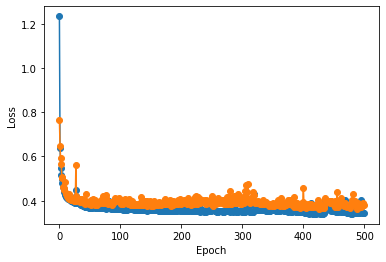

In [62]:
import matplotlib.pyplot as plt
# Visualize training loss
plt.plot(history.history['loss'], marker='o', label='train')
plt.plot(history.history['val_loss'], marker='o', label='valid')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

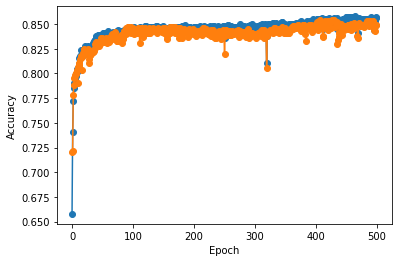

In [63]:
# Visualize training accuracy
plt.plot(history.history['accuracy'], marker='o', label='train')
plt.plot(history.history['val_accuracy'], marker='o', label='valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [72]:
[print(i.shape, i.dtype) for i in NN.inputs]
[print(o.shape, o.dtype) for o in NN.outputs]
[print(l.name, l.input_shape, l.dtype) for l in NN.layers]

(None, None) <dtype: 'float32'>
(None, 1) <dtype: 'float32'>
dense_9 (None, None) float32
dense_10 (None, 6) float32
dense_11 (None, 6) float32


[None, None, None]